# Line , Bars and Markers

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Infinite Lines

**axvline** and **axhline** draw infinite vertical / horizontal lines, at given x / y positions. They are usually used to mark special data values, e.g. in this example the center and limit values of the sigmoid function.

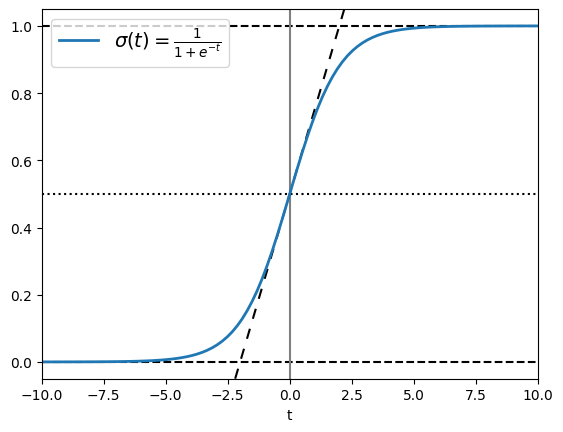

In [5]:
t = np.linspace(-10,10,100)
sig = 1 / (1+np.exp(-t))

fig,ax= plt.subplots()
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")
ax.axvline(color="grey")
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)
plt.show()

**axline** can also be used with a transform parameter, which applies to the point, but not to the slope. This can be useful for drawing diagonal grid lines with a fixed slope, which stay in place when the plot limits are moved.

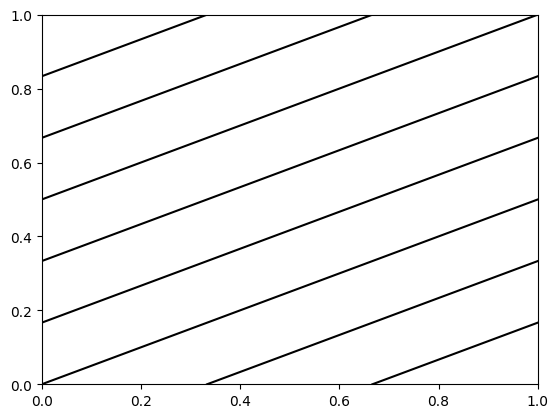

In [6]:
fig,ax = plt.subplots()
for pos in np.linspace(-2,1,10):
    ax.axline((pos,0),slope=0.5,color='k',transform=ax.transAxes)

ax.set(xlim=(0,1),ylim=(0,1))
plt.show()

## Bar Chart

This is an example showing how to control bar color and legend entries using the color and label parameters of bar. Note that labels with a preceding underscore won't show up in the legend.

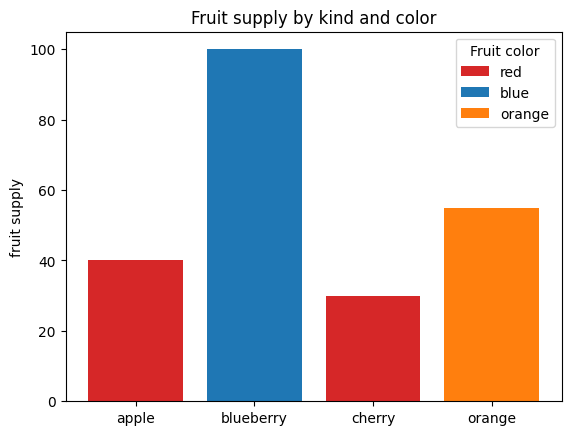

In [8]:
fig,ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']


ax.bar(fruits,counts,label=bar_labels,color=bar_colors)
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

This example shows how to use the bar_label helper function to create bar chart labels.

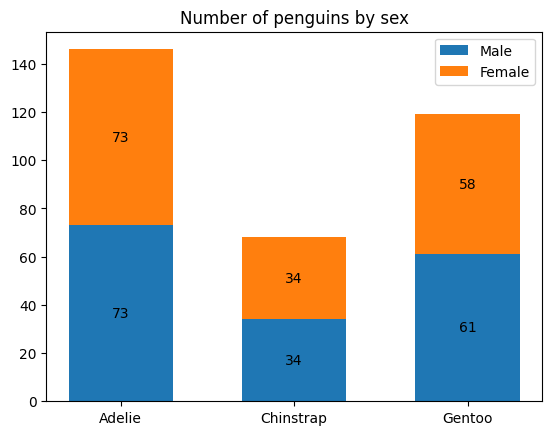

In [15]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence

fig,ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_counts in sex_counts.items():
    p = ax.bar(species,sex_counts,width,label=sex,bottom=bottom)
    bottom += sex_counts
    ax.bar_label(p,label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()
plt.show()

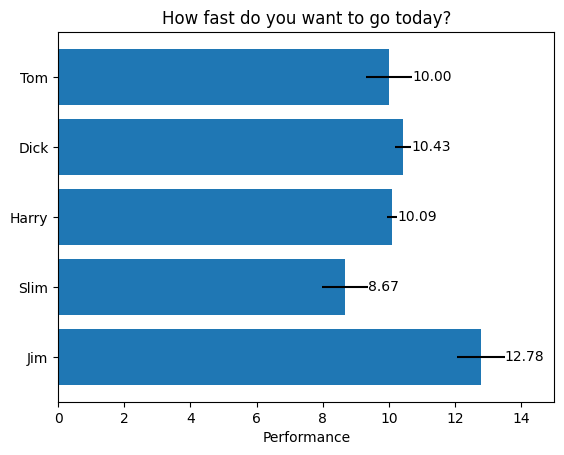

In [16]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

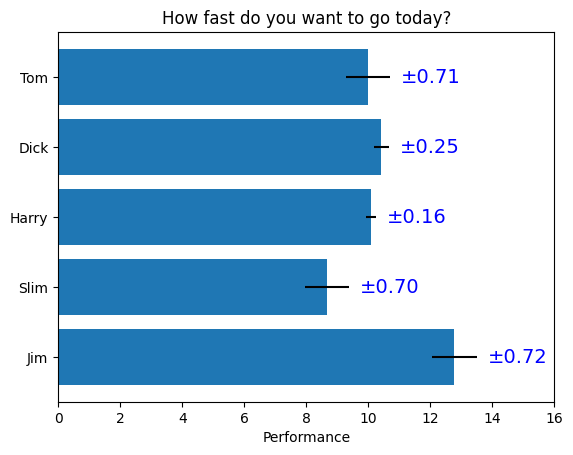

In [18]:
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with given captions, custom padding and annotate options
ax.bar_label(hbars, labels=[f'±{e:.2f}' for e in error],
             padding=8, color='b', fontsize=14)
ax.set_xlim(right=16)

plt.show()

[Text(0, 0, '4,000'), Text(0, 0, '2,000'), Text(0, 0, '7,000')]

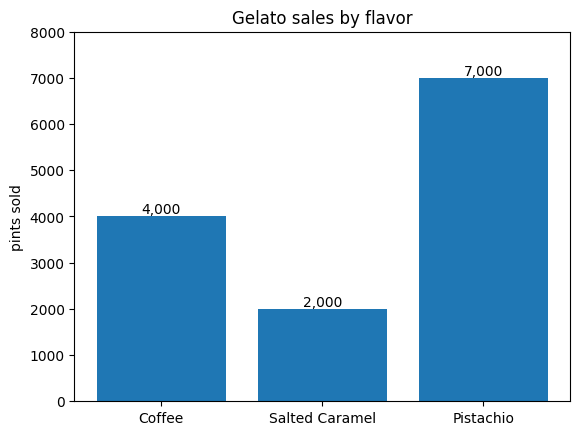

In [19]:
fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
fruit_counts = [4000, 2000, 7000]

fig, ax = plt.subplots()
bar_container = ax.bar(fruit_names, fruit_counts)
ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')